Descriptive analysis on the UNHCR data

In [10]:
import pandas as pd
import igraph as ig
import matplotlib.colors as mcolors
#from chord import Chord

df = pd.read_csv('../../data/data.csv', engine="pyarrow").drop('', axis=1)

Interestingly enough there are some duplicates:

In [11]:
counts = df.value_counts(subset=['Country_d','Country_o','year'])
counts[counts > 1].to_frame(name='count')

count
Country_d           Country_o                year       
Antigua and Barbuda Taiwan Province of China 2017      2
                    Dominica                 2022      2
                                             2012      2
                                             2013      2
                                             2014      2
...                                                  ...
Hong Kong SAR       Antigua and Barbuda      2023      2
                                             2024      2
Benin               Antigua and Barbuda      2012      2
                                             2011      2
Nauru               Antigua and Barbuda      2014      2

[9750 rows x 1 columns]

In [12]:
df[(df.Country_o == 'Antigua and Barbuda') & (df.Country_d == 'Taiwan Province of China') & (df.year == 2017)].area_o

32984    442.0
32985    960.0
Name: area_o, dtype: float64

We will have to look into why these are duplicated, it is my understanding that these shouldn't be here.

In [13]:
df.drop_duplicates(subset=['Country_o','Country_d','year'], inplace=True)

In [14]:
import numpy as np
def map_to_region(country_column):
    africa = ['The Gambia','Côte d\'Ivoire', 'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Democratic Republic of the Congo', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Republic of Congo', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe']

    north_america = ['Canada', 'Mexico', 'United States', 'The Bahamas', 'Puerto Rico']

    former_soviet_union = ['Armenia', 'Azerbaijan', 'Belarus', 'Estonia', 'Georgia', 'Kazakhstan', 'Kyrgyz Republic', 'Latvia', 'Lithuania', 'Moldova', 'Russia', 'Tajikistan', 'Turkmenistan', 'Ukraine', 'Uzbekistan']

    south_asia = ['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Iran', 'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka']

    west_asia = ['Bahrain', 'Cyprus', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Oman', 'Qatar', 'Saudi Arabia', 'Syria', 'United Arab Emirates', 'Yemen', 'Islamic Republic of Iran', 'Türkiye', 'West Bank and Gaza']

    southeast_asia = ['Brunei Darussalam', 'Cambodia', 'Indonesia', 'Lao PDR', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Timor-Leste', 'Vietnam', 'Lao P.D.R.']

    oceania = ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu']

    latin_america = ['St. Lucia', 'St. Vincent and the Grenadines', 'St. Kitts and Nevis', 'São Tomé and Príncipe', 'Aruba', 'Antigua and Barbuda', 'Argentina', 'Barbados', 'Belize', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Grenada', 'Guatemala', 'Guyana', 'Haiti', 'Honduras', 'Jamaica', 'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Suriname', 'Trinidad and Tobago', 'Uruguay', 'Venezuela']
    europe = ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kazakhstan', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom', 'Uzbekistan']
    east_asia = ['China','Hong Kong SAR','Japan','Korea', 'Macao SAR', 'Mongolia', 'Taiwan Province of China']

    region_column = []
    for country in country_column:
        if country in africa:
            region_column.append('Africa')
        elif country in north_america:
            region_column.append('North America')
        elif country in former_soviet_union:
            region_column.append('Fmr Soviet Union')
        elif country in south_asia:
            region_column.append('South Asia')
        elif country in west_asia:
            region_column.append('West Asia')
        elif country in southeast_asia:
            region_column.append('Southeast Asia')
        elif country in oceania:
            region_column.append('Oceania')
        elif country in latin_america:
            region_column.append('Latin America')
        elif country in europe:
            region_column.append('Europe')
        elif country in east_asia:
            region_column.append('East Asia')
        else:
            region_column.append(np.nan)
    return region_column

df['Region_o'] = map_to_region(df.Country_o)
df['Region_d'] = map_to_region(df.Country_d)


Most emigration in latin america?

Venezuela ranks at the top.

In [15]:
df[df['Region_o'] == 'Latin America'].groupby(['iso_o','year'], as_index=False).agg({'newarrival':'sum' }).sort_values(by='newarrival', ascending=False).head(10)

,iso_o,year,newarrival
793,VEN,2018,2508056.5
794,VEN,2019,1524435.0
796,VEN,2021,664573.0
795,VEN,2020,572356.0
792,VEN,2017,125916.0
546,NIC,2021,111562.0
419,HND,2019,80618.0
446,HTI,2021,67019.0
642,SLV,2017,65477.0
369,GTM,2019,60288.0


In [16]:
def assign_colors(s, palette=None):
    unique_values = s.unique()
    if palette is None:
        colors = mcolors.TABLEAU_COLORS
        palette = pd.Series(colors).sample(len(unique_values), random_state=42)

    color_dict = dict(zip(unique_values, palette))
    rgb_dict = {k: mcolors.to_rgb(v) for k, v in color_dict.items()}

    # Create color-mapped values and legend plot
    color_mapped_values = s.map(rgb_dict).tolist()

    return color_mapped_values

Visualization

In [22]:
df[(df.newarrival > 100)][['iso_o','iso_d','newarrival','year']]

,iso_o,iso_d,newarrival,year
225,AFG,AUS,1326.0,2000
226,AFG,AUS,2161.0,2001
229,AFG,AUS,116.0,2004
234,AFG,AUS,940.0,2009
235,AFG,AUS,1265.0,2010
...,...,...,...,...
965042,ZWE,USA,391.0,2017
965043,ZWE,USA,207.0,2018
965044,ZWE,USA,255.0,2019
965045,ZWE,USA,274.0,2020


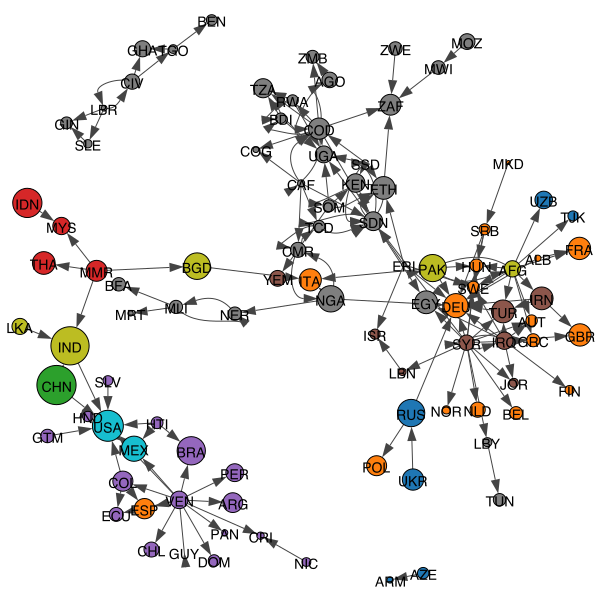

In [17]:

# graph_df = df[df.contig.astype(bool) & (df.newarrival > 500)].sort_values(by='newarrival', ascending=False).drop_duplicates(subset=['iso_o', 'iso_d'])
graph_df = df[(df.newarrival > 10001)].groupby(['iso_o','iso_d'], as_index=False).agg({'newarrival':'max','dist':'first','pop_o':'first'})

graph = ig.Graph.TupleList(graph_df[['iso_o','iso_d','dist']].itertuples(index=False), directed=True, edge_attrs=['dist'])

graph.vs['color'] = assign_colors(pd.Series(graph.vs()['name']).to_frame().merge(df, how='left', left_on=0, right_on='iso_o').drop_duplicates('iso_o')['Region_o'])
graph.vs['label'] = graph.vs['name']

vs_size = np.emath.logn(1.2, pd.Series(graph.vs()['name']).to_frame().merge(df, how='left', left_on=0, right_on='iso_o').drop_duplicates('iso_o')['pop_o'])

layout = graph.layout("kk")
ig.plot(graph, vertex_size = vs_size )

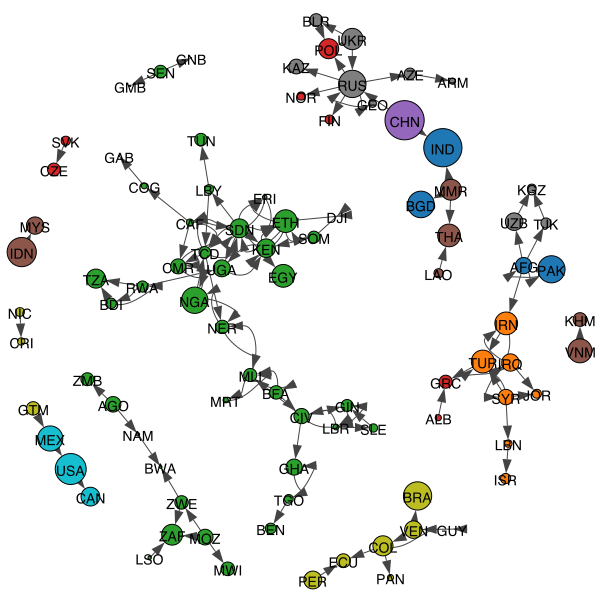

In [18]:
# why does this print of weird labels that make no sense?
import igraph as ig
graph_df = df[df.contig.astype(bool) & (df.newarrival > 500)].sort_values(by='newarrival', ascending=False).drop_duplicates(subset=['iso_o', 'iso_d'])
#graph_df = df[(df.newarrival > 50000) & (df.contig.astype(bool))].groupby(['iso_o','iso_d'], as_index=False).agg({'newarrival':'max','dist':'first','pop_o':'first'})

graph = ig.Graph.TupleList(graph_df[['iso_o','iso_d']].itertuples(index=False), directed=True)

graph.vs['color'] = assign_colors(pd.Series(graph.vs()['name']).to_frame().merge(df, how='left', left_on=0, right_on='iso_o').drop_duplicates('iso_o')['Region_o'])
graph.vs['label'] = graph.vs['name']

vs_size = np.emath.logn(1.2, pd.Series(graph.vs()['name']).to_frame().merge(df, how='left', left_on=0, right_on='iso_o').drop_duplicates('iso_o')['pop_o'])

layout = graph.layout("kk")
ig.plot(graph, vertex_size = vs_size )

Plotting country coordinate data:

Still have yet to do this.

In [19]:
country_coordinate_url = "https://gist.githubusercontent.com/tadast/8827699/raw/f5cac3d42d16b78348610fc4ec301e9234f82821/countries_codes_and_coordinates.csv"
country_coordinate = pd.read_csv(country_coordinate_url).apply(lambda x: x.str.replace('"',''))
country_coordinate[['Latitude (average)', 'Longitude (average)']] = country_coordinate[['Latitude (average)', 'Longitude (average)']].apply(lambda x: x.astype(float))

In [83]:
def plot_country_data(df, country, year, min_size = 0):
    iso_o = df[df.Country_o == country].iso_o.iloc[0]


    o_obs = df[(df.Country_o == country) & (df.year == year)].agg({'newarrival':'sum'}).rename('newarrival')
    o_obs.index = [iso_o]
    o_obs = o_obs.to_frame()

    df1 = df[(df.Country_o == country) & (df.year== year)].groupby('iso_d').agg({'newarrival':'sum'})
    df1 = df1[df1.newarrival > min_size]
    df1 = pd.concat([df1, o_obs], axis=0) 
    df1['location'] = ['origin' if country == iso_o else 'destination' for country in df1.index]
    df1 = df1.rename_axis('iso').reset_index()

    return df1  

plot_country_data(df, 'Venezuela', 2018, 1000) 

,iso,newarrival,location
0,ARG,71414.0,destination
1,BRA,92922.0,destination
2,CAN,1254.0,destination
3,CHL,286788.0,destination
4,COL,1105410.0,destination
5,CRI,2884.0,destination
6,ECU,226614.5,destination
7,ESP,20015.0,destination
8,GUY,21400.0,destination
9,MEX,23469.0,destination


In [111]:
import mpl_toolkits
import basemap

ModuleNotFoundError: No module named 'basemap'

In [114]:
!pip install basemap

  Using cached basemap-1.3.6.zip (156 kB)
  Installing build dependencies ... |^C
anceled
ERROR: Operation cancelled by user


In [ ]:
from mpl_toolkits.basemap import Basemap as Basemap
import matplotlib.pyplot as plt

plt.figure(figsize = (10,9))

basemap = Basemap(
    projection = 'merc',
    llcrnrlon = -180, 
    urcrnrlon = -50,     
    llcrnrlat = -10,  
    urcrnrlat = 70,    
    lat_ts = 0,
    resolution = 'l',
    suppress_ticks = True)

In [93]:
import plotly.express as px

fig = px.scatter_geo(plot_country_data(df, 'Venezuela', 2018, 1000), locations="iso",
                     size="newarrival",
                     # projection="natural earth",
                     color = 'location',
                     title = 'Venezuela in 2018'
                     )

fig.update_geos(
    visible=True, resolution=50,
    showcountries=True, countrycolor="RebeccaPurple"
)
fig.show()

In [89]:
fig = px.scatter_geo(plot_country_data(df, 'Colombia', 2018, 1000), locations="iso",
                     size="newarrival",
                     #projection="natural earth",
                     color = 'location'
                     )

fig.update_geos(
    visible=True, resolution=50,
    showcountries=True, countrycolor="RebeccaPurple")
fig.show()

In [99]:
fig = px.scatter_geo(plot_country_data(df, 'Nicaragua', 2021, 1000), locations="iso",
                     size="newarrival",
                     #projection="natural earth",
                     color = 'location'
                     )

fig.update_geos(
    visible=True, resolution=50,
    showcountries=True, countrycolor="RebeccaPurple")
fig.show()